In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [36]:
Project_Directory = "C:/Users/DESKTOP-2/Documents/Github/DTfF_group_project"

In [37]:
ea = pd.read_excel(Project_Directory+'/data/pmi-eu-sep20.xlsx',sheet_name='EA', engine='openpyxl')
de = pd.read_excel(Project_Directory+'/data/pmi-eu-sep20.xlsx',sheet_name='DE', engine='openpyxl')
fr = pd.read_excel(Project_Directory+'/data/pmi-eu-sep20.xlsx',sheet_name='FR', engine='openpyxl')

In [38]:
pd.set_option('max_columns', None)

ea.drop([0], inplace=True)

ea.set_index('Name', inplace=True)
de.set_index('Name', inplace=True)
fr.set_index('Name', inplace=True)

In [39]:
ea = ea.astype(float)
ea.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 360 entries, 1997-01-15 to NaT
Data columns (total 30 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   EM MARKIT PMI: MANUFACTURING SADJ                          280 non-null    float64
 1   EM MARKIT PMI: MANUFACTURING - OUTPUT SADJ                 280 non-null    float64
 2   EM MARKIT PMI: MANUFACTURING - NEW ORDERS SADJ             280 non-null    float64
 3   EM MARKIT PMI: MANUFACTURING - EMPLOYMENT SADJ             280 non-null    float64
 4   EM MARKIT PMI: MANUFACTURING - DELIVERY TIMES SADJ         280 non-null    float64
 5   EM MARKIT PMI: MANUFACTURING - STOCKS OF PURCHASES SADJ    280 non-null    float64
 6   EM MARKIT PMI: MANUFACTURING - INPUT PRICES SADJ           280 non-null    float64
 7   EM MARKIT PMI: MANUFACTURING - OUTPUT PRICES SADJ          215 non-null    float64
 8 

In [40]:
ea_man = ea.iloc[:,0:13]
ea_ser = ea.iloc[:,13:20]
ea_comp = ea.iloc[:,20:29]

ea_comp_output = ea.iloc[:,24]

ea20_man = ea.iloc[276:,0]
ea20_ser = ea.iloc[276:,13]
ea20_comp_empl = ea.iloc[276:,21]

## Plots 

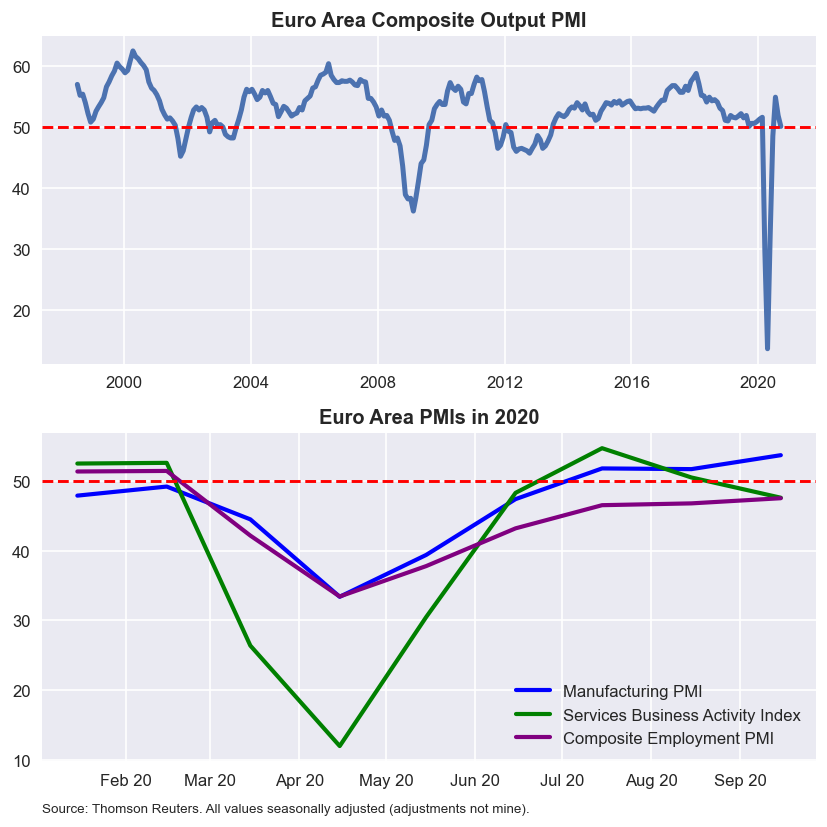

In [41]:
fig, ax = plt.subplots(figsize=[7,7], dpi=120, nrows=2, ncols=1)

ax[0].plot(ea_comp_output, lw=3)
ax[0].set_title('Euro Area Composite Output PMI', fontweight='bold')
ax[0].axhline(y=50, color='r', linestyle='--')
ax[0].xaxis.set_major_formatter(DateFormatter("%Y"))

ax[1].plot(ea20_man, color='blue', label='Manufacturing PMI', lw=2.5)
ax[1].plot(ea20_ser, color='green', label='Services Business Activity Index', lw=2.5)
ax[1].plot(ea20_comp_empl, color='purple', label='Composite Employment PMI', lw=2.5)
ax[1].legend()
ax[1].set_title('Euro Area PMIs in 2020', fontweight='bold')
ax[1].axhline(y=50, color='r', linestyle='--')
ax[1].xaxis.set_major_formatter(DateFormatter("%b %y"))

plt.annotate('Source: Thomson Reuters. All values seasonally adjusted (adjustments not mine).', (0,0), (0,-25), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='top')

plt.style.use('seaborn')
fig.tight_layout()

In [42]:
fig.savefig("output/PMIs.png")